In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.shape

(150, 5)

In [14]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df1 = df[:50]
df2 = df[50:100]
df3 = df[100:]

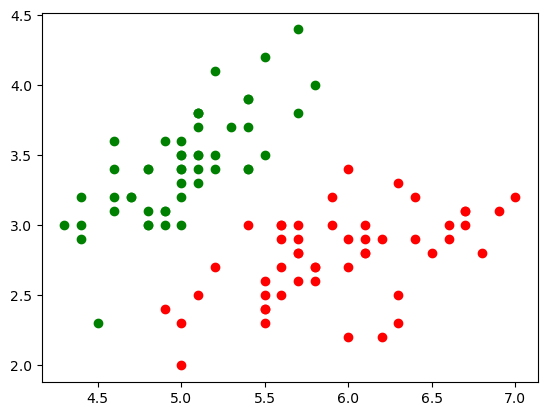

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color= 'green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color= 'red')

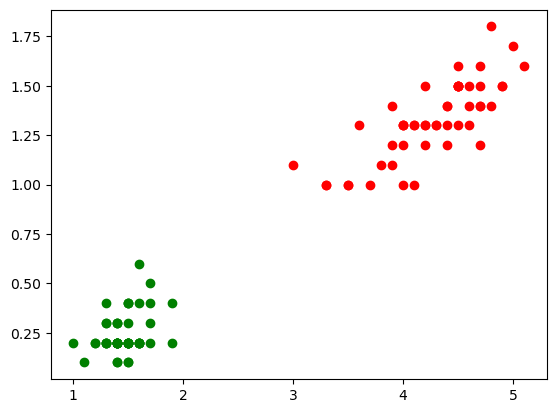

In [19]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color= 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color= 'red')

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [24]:
xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [26]:
len(xtrain)

120

## Importing Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [31]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [32]:
knn.score(xtest, ytest)

0.9666666666666667

### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pre = knn.predict(xtest)
cm = confusion_matrix(ytest, y_pre)

Text(58.222222222222214, 0.5, 'Truth')

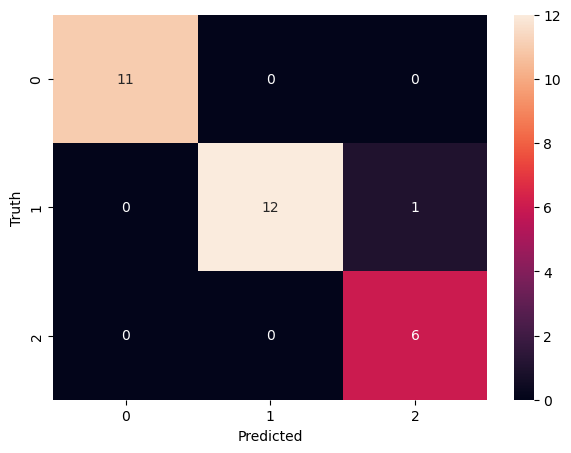

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
print(classification_report(ytest, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [39]:
accuracy_score(ytest, y_pre)

0.9666666666666667